In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

from os.path import join

plt.style.use(["seaborn", "thesis"])

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

plt.rcParams['figure.figsize'] = (8, 4)

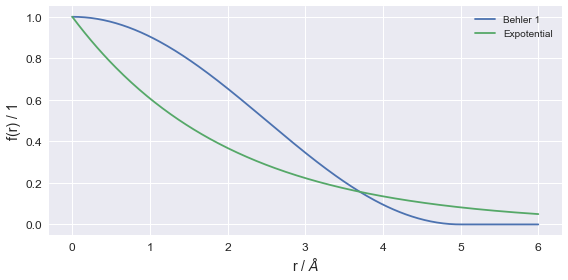

In [3]:
from SCFInitialGuess.descriptors.cutoffs import behler_cutoff_1

t = np.linspace(0, 6, 300)
R_c = 5
tau = 2

plt.plot(t, behler_cutoff_1(t, R_c), label="Behler 1")
plt.plot(t, np.exp(-t/tau), label="Expotential")

plt.xlabel("r / $\AA$")
plt.ylabel("f(r) / 1")

plt.legend()
plt.tight_layout()

plt.savefig("/home/jo/Repos/MastersThesis/AtomicBlocks/figures/CutOffs.pdf")


# Gaussians Mit CutOff

In [4]:
def plot_normal_model(model, t):
    for r_s, eta in zip(model[0], model[1]):
        plt.plot(t, np.exp(-1 * eta*(t - r_s)**2))
        
def plot_cutoff_model(model, R_c, t=None):
    mus, sigmas = model
    
    if t is None:
        t = np.linspace(0, 1.2 * R_c, 200)
    
    for r_s, eta in zip(mus, sigmas):
        plt.plot(
            t, 
            np.exp(-1 * eta*(t - r_s)**2) * \
            behler_cutoff_1(t, R_c)
        )

def plot_damped_model(model, tau, t=None):
    mus, sigmas = model
    
    if t is None:
        t = np.linspace(0, 1.2 * tau, 200)
    
    for r_s, eta in zip(mus, sigmas):
        plt.plot(
            t, 
            np.exp(-1 * eta*(t - r_s)**2) * \
            np.exp(- t / tau)
        )

In [5]:
model = (
    np.arange(1,11)*0.5,
    [5] * 10,
)

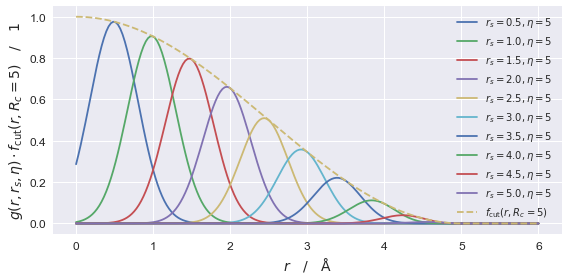

In [6]:
from SCFInitialGuess.descriptors.cutoffs import behler_cutoff_1

R_c = 5
t = np.linspace(0, 1.2 * R_c, 200)

for r_s, eta in zip(model[0], model[1]):
    plt.plot(
        t, 
        np.exp(-1 * eta*(t - r_s)**2) * \
        behler_cutoff_1(t, R_c),
        label="$r_s={0}, \eta={1}$".format(r_s, eta)
    )
    
plt.plot(t, behler_cutoff_1(t, R_c), "--", label="$f_\mathrm{cut}(r, R_c=5)$")

plt.legend()
plt.ylabel("$g(r, r_s, \eta) \cdot f_{\mathrm{cut}}(r, R_c=5)\quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")
plt.tight_layout()

plt.savefig("/home/jo/Repos/MastersThesis/AtomicBlocks/figures/GaussiansCutOff.pdf")


# Utils 

In [9]:
from SCFInitialGuess.descriptors.utilities import plot_normal_model,plot_periodic_model

# Periodic Gaussians 

(0, 1)

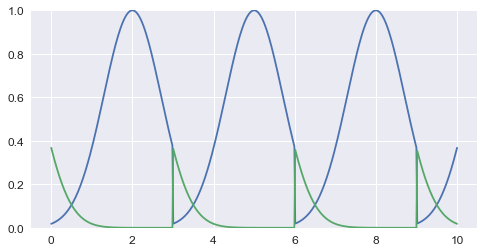

In [11]:
x = np.linspace(0, 10, 500)
p = 3
def f(x):
    return np.exp(-(x-2)**2)
plt.plot(x, f(x % p))
#plt.plot(x, f((x % p) - p))
plt.plot(x, f((x % p) + p))

plt.ylim([0,1])

# Raidal descriptors 

In [12]:
path = "/home/jo/Repos/MastersThesis/Appendix/figures/"

## Origin 

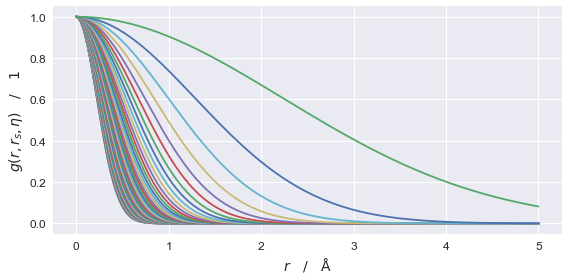

In [13]:
model = (
    [0.0] * 50,
    np.linspace(10, 0.1, 50)
)

plot_normal_model(model, np.linspace(0, 5, 200))

plt.ylabel("$g(r, r_s, \eta) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")

plt.tight_layout()

plt.savefig(path + "RadialModelOrigin.pdf")

## Man 

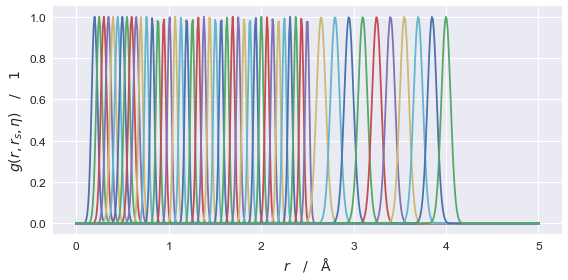

In [14]:
r_model_concentrated = (
    list(np.linspace(0.2, 0.7, 11))[:-1] + \
    list(np.linspace(0.7, 2.5, 30)) + \
    list(np.linspace(2.5, 4, 11))[1:],
    [500]*10 + \
    [1000]*30 + \
    [200]*10,
)

plot_normal_model(r_model_concentrated, np.linspace(0, 5, 500))

plt.ylabel("$g(r, r_s, \eta) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")

plt.tight_layout()

plt.savefig(path + "RadialModelMan.pdf")


## Unif-5 

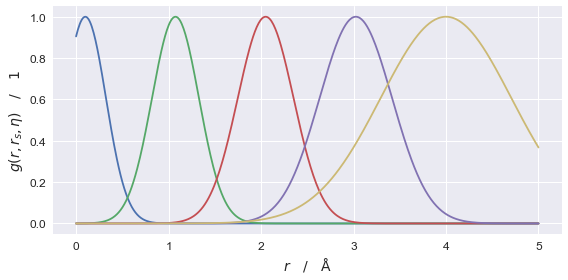

In [15]:
from SCFInitialGuess.descriptors.models import make_uniform

model = make_uniform(5, 5, eta_max=10, eta_min=1)

plot_normal_model(model, np.linspace(0, 5, 500))

plt.ylabel("$g(r, r_s, \eta) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")

plt.tight_layout()

plt.savefig(path + "RadialModelUnif5.pdf")


## Unif-25 

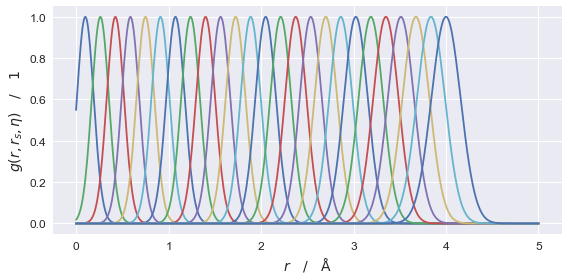

In [16]:
model = make_uniform(25, 5, eta_max=60, eta_min=20)

plot_normal_model(model, np.linspace(0, 5, 500))

plt.ylabel("$g(r, r_s, \eta) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")

plt.tight_layout()

plt.savefig(path + "RadialModelUnif25.pdf")


## Unif-50 

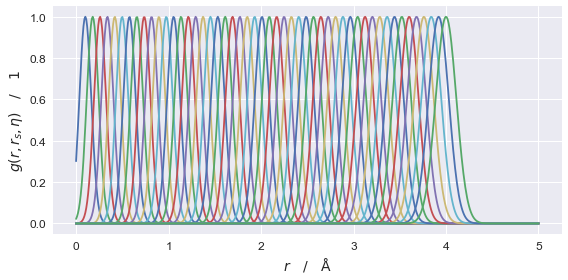

In [17]:
model = make_uniform(50, 5, eta_max=120, eta_min=40)

plot_normal_model(model, np.linspace(0, 5, 500))

plt.ylabel("$g(r, r_s, \eta) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")

plt.tight_layout()

plt.savefig(path + "RadialModelUnif50.pdf")


## Unif-250 

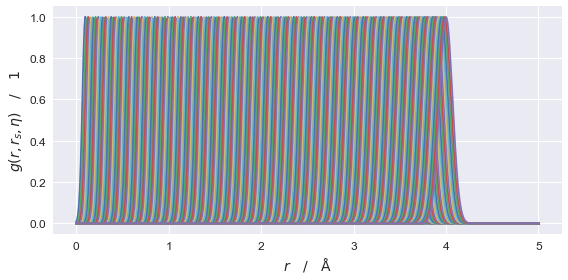

In [18]:
model = make_uniform(250, 5, eta_max=500, eta_min=100)

plot_normal_model(model, np.linspace(0, 5, 500))

plt.ylabel("$g(r, r_s, \eta) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$r\quad \mathrm{ / } \quad\mathrm{\AA}$")

plt.tight_layout()

plt.savefig(path + "RadialModelUnif250.pdf")


# Angular 

In [ ]:
from SCFInitialGuess.descriptors.models import make_periodic_uniform

## Azimuthal 

### PG-10

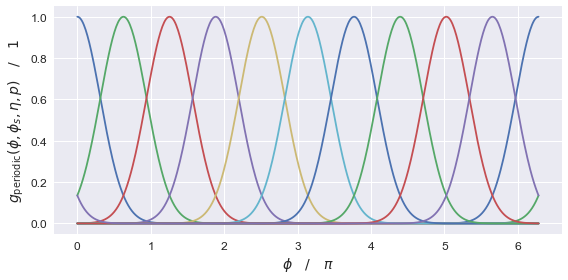

In [26]:
#phi_model_evenly_10 = (
#    np.linspace(0, 2*np.pi, 10),
#    [8] * 10,
#    2 * np.pi
#)
phi_model_evenly_10 = make_periodic_uniform(10, 2 * np.pi)


plot_periodic_model(phi_model_evenly_10, np.linspace(0, 2 * np.pi, 500))


plt.ylabel("$g_\mathrm{periodic}(\phi, \phi_s, \eta, p) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$\phi\quad \mathrm{ / } \quad \pi$")

plt.tight_layout()

plt.savefig(path + "AngularModelUnif10.pdf")

### PG-20

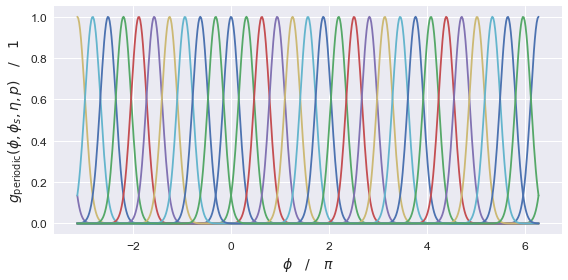

In [27]:

model = make_periodic_uniform(20, 2*np.pi)

plot_periodic_model(model, np.linspace(-np.pi, 2*np.pi, 500))

plt.ylabel("$g_\mathrm{periodic}(\phi, \phi_s, \eta, p) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$\phi\quad \mathrm{ / } \quad \pi$")

plt.tight_layout()

plt.savefig(path + "AngularModelUnif20.pdf")

### PG-50 

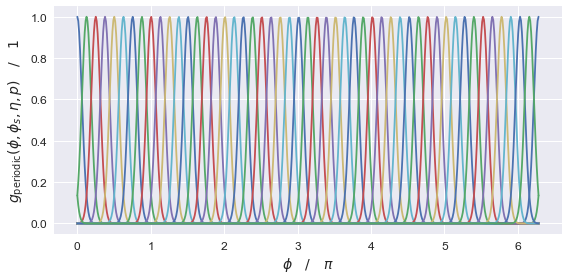

In [28]:
#phi_model_evenly_50 = (
#    np.linspace(0, 2*np.pi, 50),
#    [300] * 50,
#    2 * np.pi
#)
phi_model_evenly_50 = make_periodic_uniform(50, 2*np.pi)

plot_periodic_model(phi_model_evenly_50, np.linspace(0, 2 * np.pi, 500))


plt.ylabel("$g_\mathrm{periodic}(\phi, \phi_s, \eta, p) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$\phi\quad \mathrm{ / } \quad \pi$")

plt.tight_layout()

plt.savefig(path + "AngularModelUnif50.pdf")

## Polar 

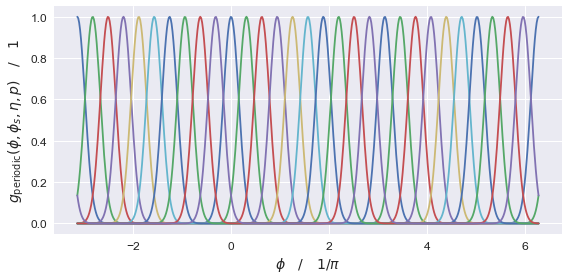

In [29]:
model = make_periodic_uniform(10, np.pi)

plot_periodic_model(model, np.linspace(-np.pi, 2*np.pi, 500))

plt.ylabel("$g_\mathrm{periodic}(\phi, \phi_s, \eta, p) \quad \mathrm{ / }\quad 1 $")
plt.xlabel("$\phi\quad \mathrm{ / } \quad 1/\pi$")

plt.tight_layout()

plt.savefig(path + "PolarModelUnif10.pdf")